<a href="https://colab.research.google.com/github/AhmedZedan/CNN-model/blob/main/Building%20a%20CNN%20in%20Keras%20to%20predict%20the%20digit%20of%20handwritten%20digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow

In [2]:
from tensorflow import keras

# **Loading the dataset**

In [3]:
from keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# **Exploratory data analysis**

In [5]:
import matplotlib.pyplot as plt

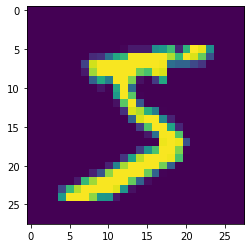

In [6]:
plt.imshow(train_images[0])

In [7]:
train_images[0].shape

(28, 28)

# **Data pre-processing**

In [8]:
#reshape data to fit model
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
#one-hot encode target column
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
for i in range(10):
  print(train_labels[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# **Building the model**

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [13]:
#create model
model = Sequential()

In [14]:
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# **Compiling the model**

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training the model**

In [16]:
#train the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 194s 95ms/step - loss: 1.0724 - accuracy: 0.9071 - val_loss: 0.0827 - val_accuracy: 0.9754
Epoch 2/3
1875/1875 [==============================] - 180s 96ms/step - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 3/3
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0988 - val_accuracy: 0.9734


In [17]:
#predict first 4 images in the test set
model.predict(test_images[:4])

array([[7.6569275e-09, 3.3431049e-13, 1.8453592e-06, 7.2287739e-06,
        1.1112690e-11, 1.1287362e-08, 3.9233323e-14, 9.9998987e-01,
        5.2569987e-08, 9.2072861e-07],
       [7.9030187e-08, 4.3353787e-09, 9.9999952e-01, 3.2122705e-12,
        8.6884249e-13, 3.9006572e-14, 3.7242194e-07, 7.4200923e-12,
        6.7381443e-12, 1.4393325e-18],
       [2.2849889e-08, 9.9634343e-01, 2.8838001e-03, 5.5815809e-07,
        9.7432221e-06, 1.8132703e-05, 1.5903393e-05, 2.5761003e-07,
        7.2789041e-04, 1.6542290e-07],
       [9.9999988e-01, 5.0285817e-13, 1.8299997e-09, 1.4890936e-09,
        1.9672822e-11, 2.5505559e-08, 1.2521635e-07, 1.0013724e-11,
        5.4614220e-09, 1.7490546e-09]], dtype=float32)

In [18]:
#actual results for first 4 images in test set
test_labels[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)